<a href="https://colab.research.google.com/github/francescakaganzi/MachineLearning/blob/main/Employee_Attrition_Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Prediction Using Machine Learning Decision Trees Assignment

**Name:** Francesca Kaganzi

**Student no:** 2300704669

**Reg No:** 2023/HD05/04669U

# Introduction

In today's dynamic and competitive job market, employee attrition poses a significant challenge for organizations. The loss of valuable talent not only disrupts business operations but also incurs substantial costs in terms of recruitment, training, and lost productivity. To address this issue effectively, businesses are turning to the power of machine learning and predictive analytics.

This notebook serves as a hypothesis to explore and help identify the reasons why individuals may be leaving the organizations in order to help anticipate and mitigate employee turnover. Therefore I will attempt the following:

1. Exploratory Data Analysis
2. Corelation Analysis and Feature Importance
3. Recommendations

# 1. Loading Libraries & Dataset

## 1.1 Loading Libraries

In [ ]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1.2 Loading Data

In [ ]:
#Create Dataframe of the Employee Attrition Dataset / Read in the Data
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/employee_attrition_dataset.csv')

## 1.3 Statistics about the DataSet

Before any analysis, it is important for the data to be cleaned.

**Key Questions to verify:**

1. Missing Data: is there any missing data that we need to account for?
2. Column Classes: are all the column classes set to the appropriate data types?
3. Irrelevant Data: is there any data that we don’t need for the analysis?
4. Data Shape: what are the features and observations in the dataset?


In [ ]:
# Display information about the total number of Features and Observations
print(df.shape)
# Display the top 5 rows of the Dataframe
display(df.head(5))

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Statistical summary of the dataset
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Get the object types of the Feature Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<Axes: >

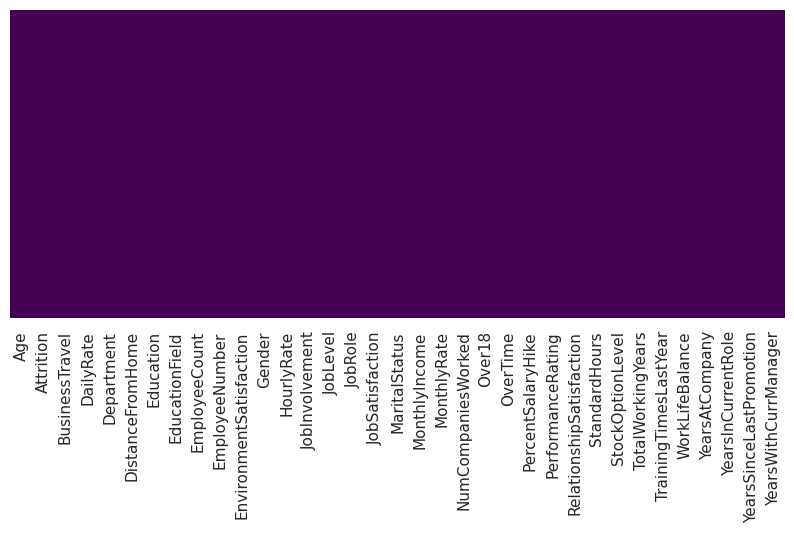

In [ ]:
# Heatmap to check for missing values in the dataset
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

**Initial observations from cleaning the data;**
 * This data set includes **1470 rows** /observations and **35 features**/ columns.
 * Feature columns for **'Over18'**, **'StandardHours'** and **'EmployeeCount'** appear to have similar results for all observations.
 * Recommendation is that these columns do not contribute to the Attrition in any significant way and may be dropped.
 * No null values were observed in the Feature Columns.
 * Some of the Feature Columns are of the object Data Type and consideration has to be made for converting them to integer Data Type.

In [ ]:
#Drop unncessary columns
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'])

# 2. Exploratory Data Analysis (EDA)

The purpose of the EDA is to help understand the data and form a hypothes. At an initial glance of the variables, the features can be split into categorical and numerical features.

**Key Questions to verify:**

1. Target variable distribution: Distribution of the target variable 'Attrition'?
2. Attrition distribution across the numerical features?
3. Attrition distribution across the categorical features?


## 2.1 Distribution of the Target Variable 'Attrition'

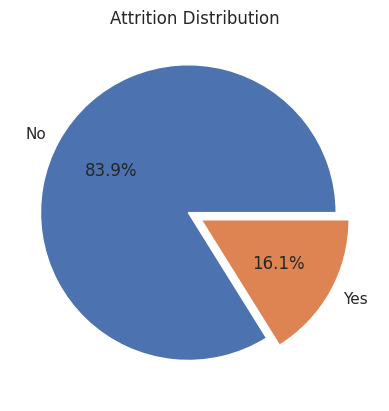

In [ ]:
# Define the explode values to create a "pie slice" effect
dfexplode = (0.05, 0.05)
# Create a pie chart to visualize the distribution of 'Attrition' values
plt.pie(df['Attrition'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode=dfexplode)
# Add a title to the pie chart
plt.title("Attrition Distribution")
# Display the pie chart
plt.show()

**Observations from the target variable 'Attrition'.**

* Dataset appears imbalanced that is **16.1%** of employees leave but the majority **83.9% **stay.

## 2.2 Frequency Analysis of Numerical Features

The DataSet is going to be split and analysed based on Numerical and Categorical.

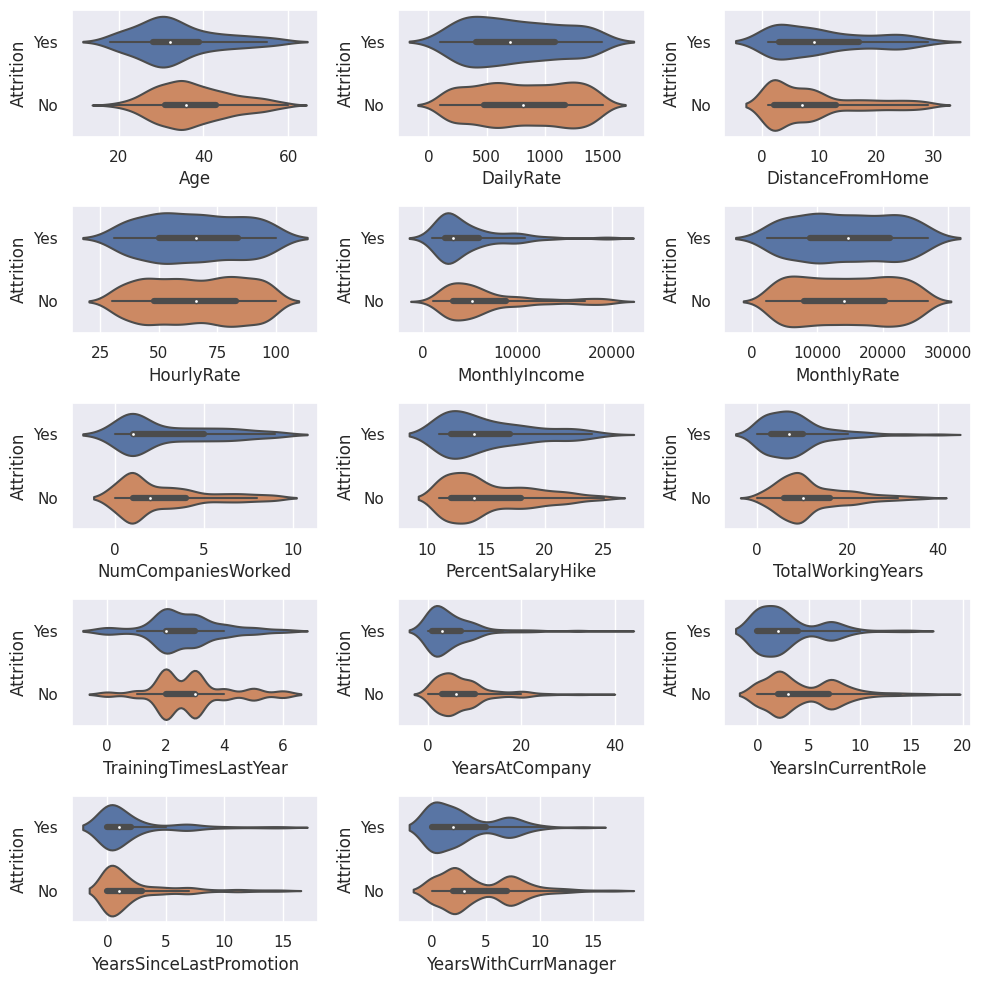

In [ ]:
#Cross Analysis between Attrition and Numerical Features

# List of numerical column names to be visualized
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Create a new figure with a specific size (10x10 inches)
plt.figure(figsize=(10, 10))
# Loop through the numerical columns for visualization
for i, column in enumerate(numerical_list, 1):
    # Create subplots in a 5x3 grid (5 rows, 3 columns)
    plt.subplot(5, 3, i)
    # Create a violin plot to visualize the distribution of 'Attrition' for the current numerical feature
    sns.violinplot(data=df, x=column, y='Attrition')
# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the violin plots
plt.show()

**Findings of Numerical Features**
* **Age:** Most employees are in the 30 to 40 range. Although not definitive, there does seem to be a higher percentage of those in their 20s leaving the organization.
* **DistanceFromHome:** Most of employees live approximately 10km from work.
* **MonthlyIncome:** The majority of monthly income of employees earn around 5000. A few employees have an income over 10000. Employees leaving the organization are majorly the lower income earners.
* **NumCompaniesWorked:** Most employees only worked for one company
* **TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager:** These time type data are right skewed which most of people stay in company only for a few years.
* **DailyRate, HourlyRate, MonthlyRate:** These time types appear to be normal distributions.

## 2.3 Frequency Analysis of Continuous Features

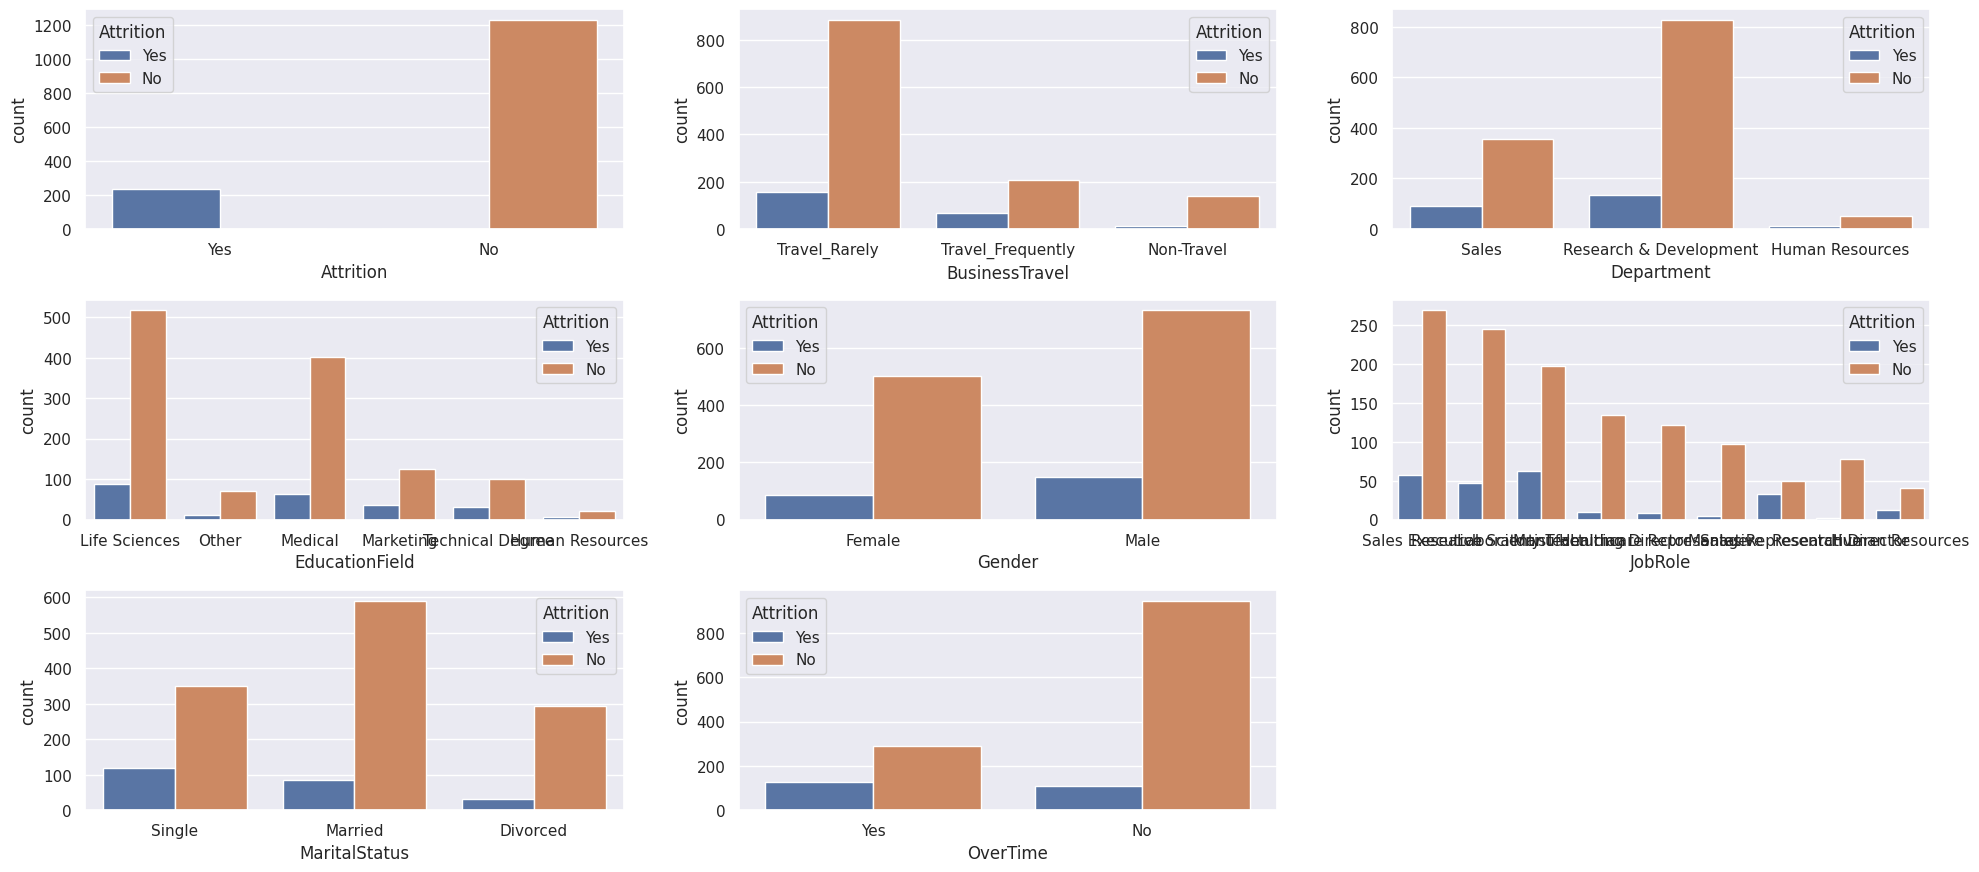

In [ ]:
#Cross Analysis between Attrition and Categorical Features

# Select categorical columns from the DataFrame
categorical_df = df.select_dtypes(include=['object'])

# Create a new figure with a specific size (20x20 inches)
plt.figure(figsize=(20, 20))
# Initialize locators for subplot positioning
locator1, locator2 = [0, 0]
# Loop through each categorical column for visualization
for column in categorical_df:
    # Check if the current column is 'JobRole'
    if column == 'JobRole':
        # Create a subplot that spans 3 columns (colspan=3) and 1 row (rowspan=1)
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        # Create a countplot for 'JobRole' with hue='Attrition'
        sns.countplot(x=column, hue='Attrition', data=df)
        # Update the locator positions
        locator1 += 1
        locator2 = 0
        continue
    # Create a subplot within the 7x3 grid
    plt.subplot2grid((7, 3), (locator1, locator2))
    # Create a countplot for the current categorical column with hue='Attrition'
    sns.countplot(x=column, hue='Attrition', data=df)
    # Update the locator position in the grid
    locator2 += 1
    # Check if a new row should start
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    # Check if all subplots have been created
    if locator1 == 7:
        break
# Adjust the layout for better spacing between subplots
plt.tight_layout()
# Display the figure containing the countplots
plt.show()

**Findings of Categorical Features**
* **Job Role:** Sales Reps had the highest attrition rate followed by Laboratory Technicians and Human Resource.
* **Department:** the attrition rate within departments did not vary as much and had almost similar numbers of employees leaving meaning that departmental issues were not a big contributer to employees leaving.
* **Job Level:** Employees at the lowest level are leaving more than those in higher levels. However, it may be worth while to investigate why there was a slight jump in attrition from level 2 to level 3.
* **Gender:** More males were leaving the company in comparison to the females. However is it significant enough to be a factor?

## 2.4 Correlation Analysis

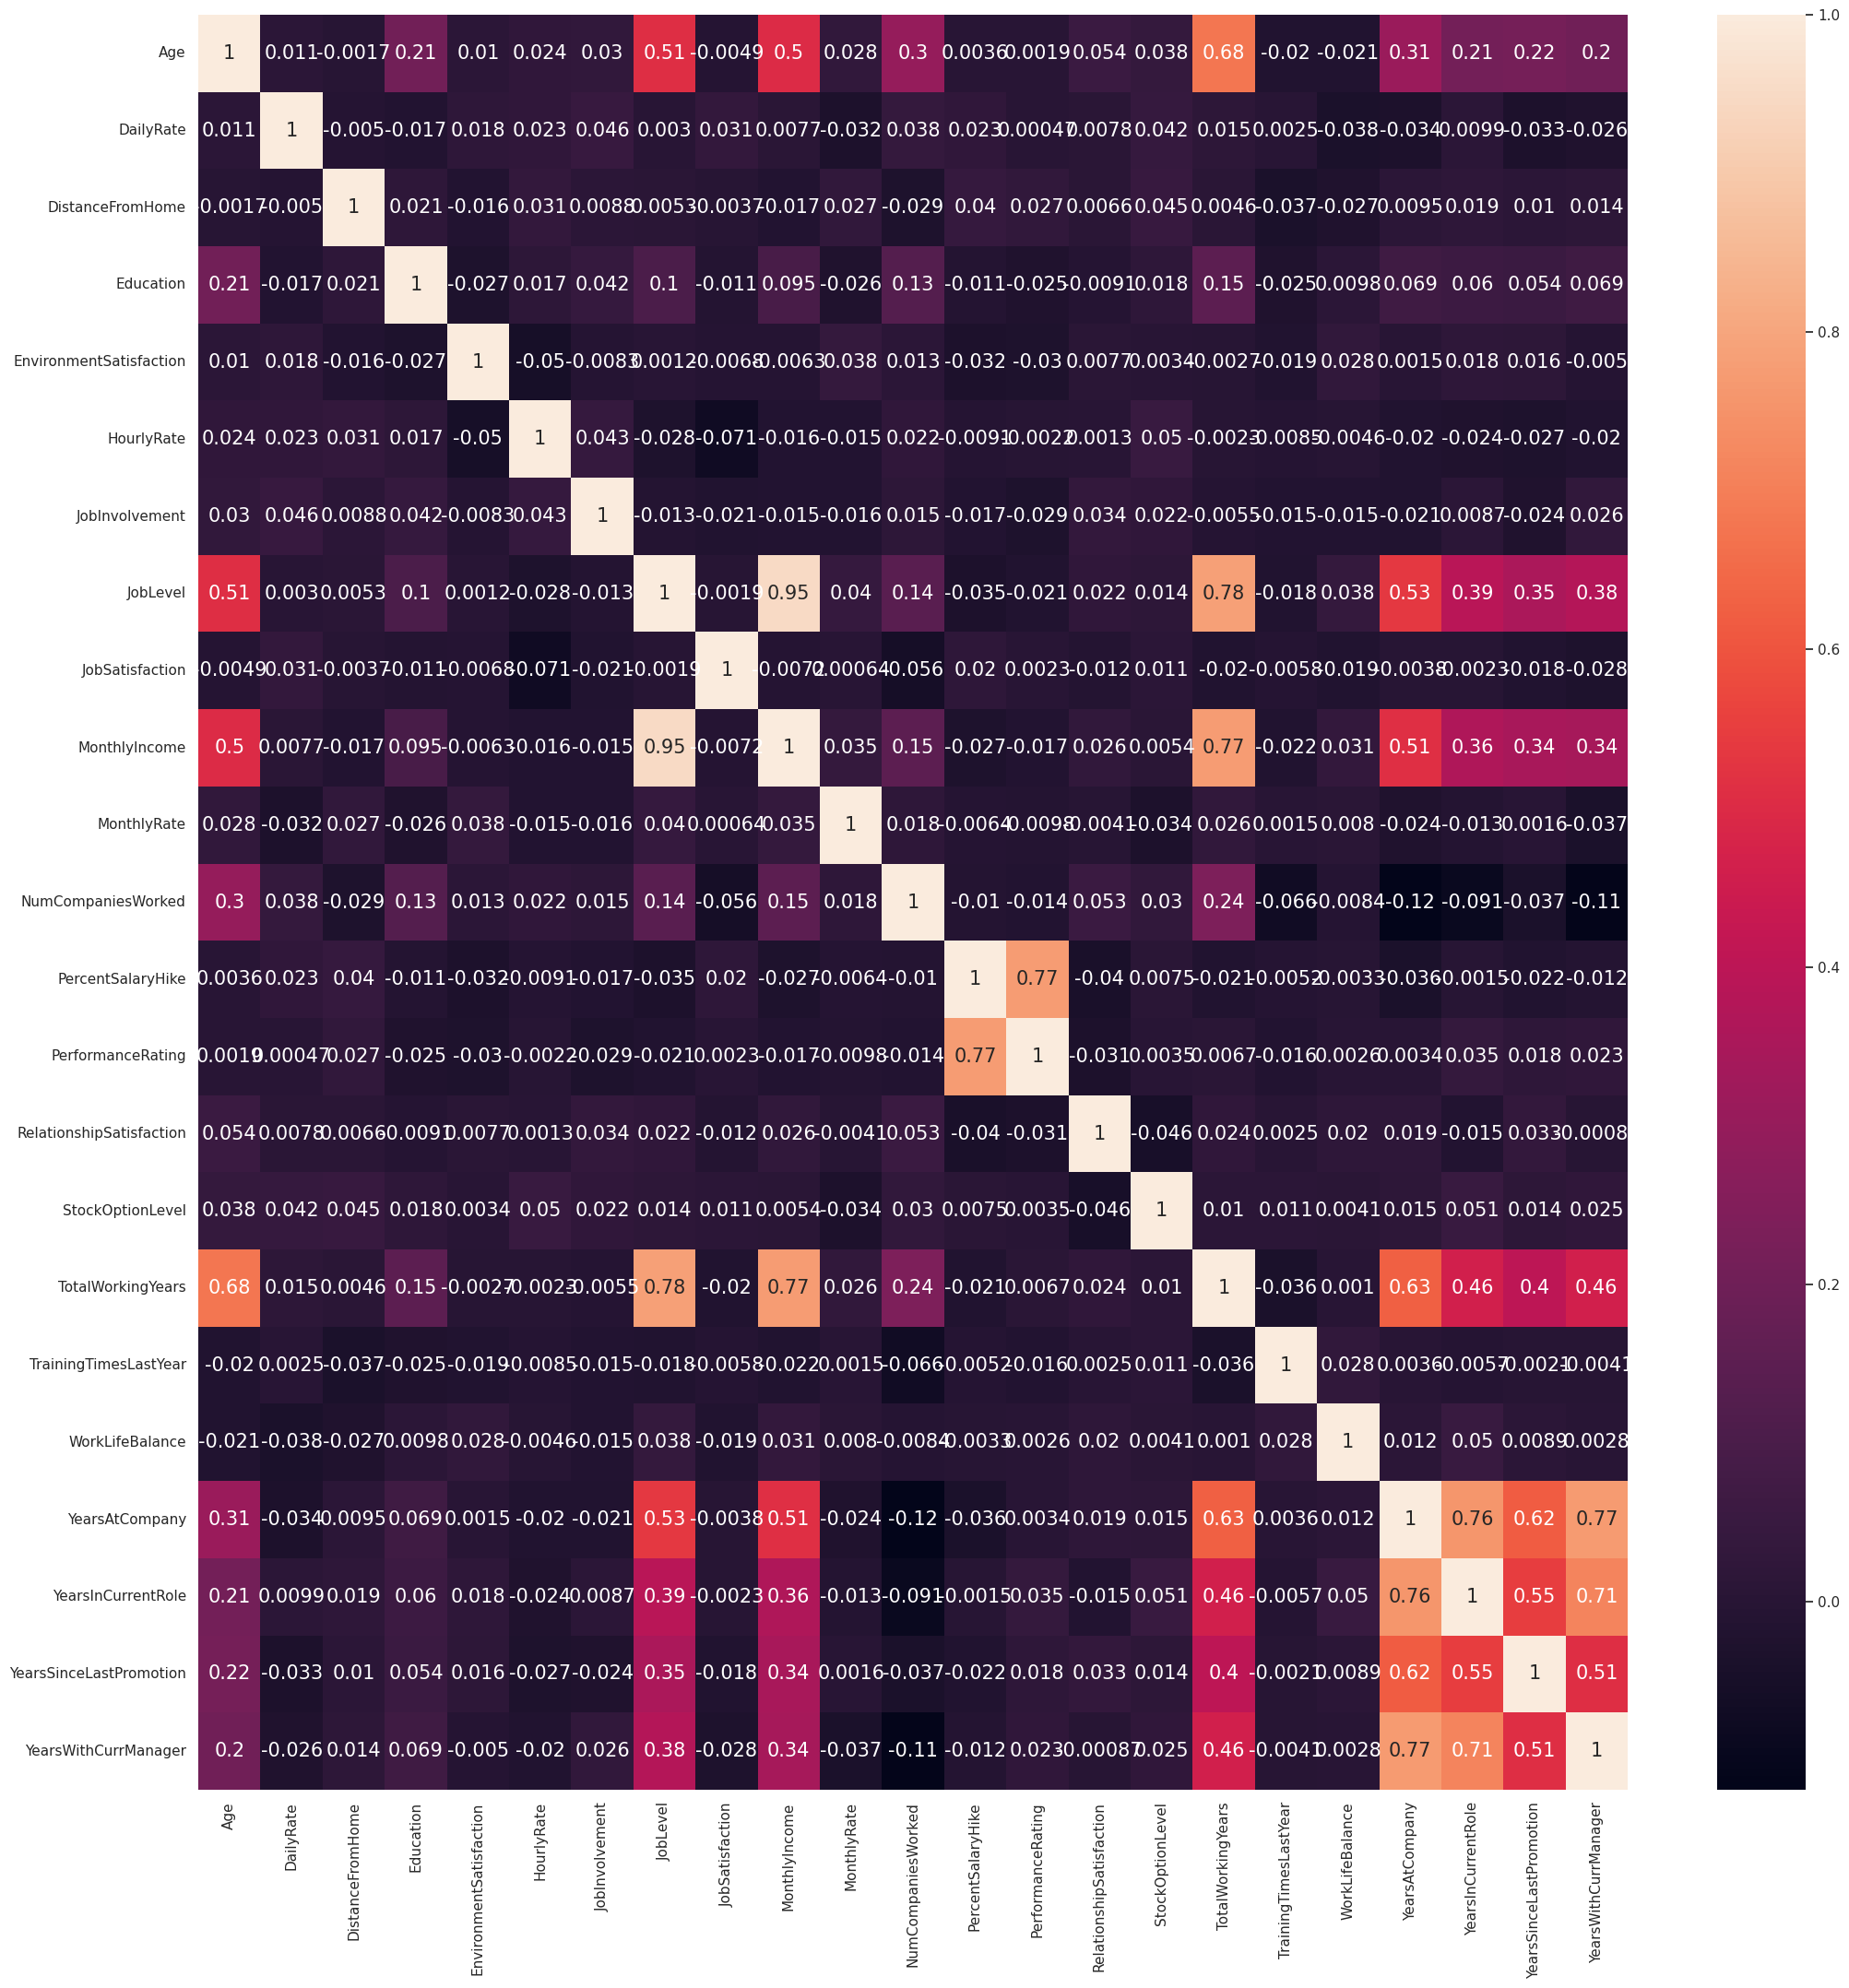

In [ ]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create a new figure with a specific size (25x25 inches)
plt.figure(figsize=(25, 25))
# Generate a heatmap to visualize the correlation matrix of numerical features
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={"size": 15})
# Add a title to the heatmap
plt.title("Correlation Heatmap of Numerical Features")
# Display the heatmap
plt.show()

**Observations of the Corelation Analysis Heat Map**

* There is a high correlation between Percent Salary Hike and Performance Rating as well as Job Level and Monthly Income.
* Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager, Total Working Years, Monthly Income, and Job Level are also correlated significantly.

## 2.5 Feature Selection and Importance Analysis

The purpose of the Feature Importance is to help identify the features that have a direct impact on the rate of attrition. At an initial glance, Monthly Income, Age, Department and Performance Satisfaction are a few of the features that appear to impact employees decision to leave.

**Key Questions to verify:**

1. Algorithm to measure Feature Importance: which algorithm will select the best features for the model.
2. Features selected: will the features selected match up with the observations in the EDA above?
3. Preprocess the Data: how best to encode and scale the data in order to build an accurate model?

### 2.5.1 Preprocess and Encode the Data

In [ ]:
# Loop through the categorical columns in the DataFrame
for categorical_df in df.select_dtypes(include='object').columns:
    # Create a LabelEncoder object
    le = preprocessing.LabelEncoder()
    # Use LabelEncoder to transform the categorical column into numerical labels
    df[categorical_df] = le.fit_transform(df[categorical_df])
    # Print the unique values in the transformed column to understand the label encoding
    unique_labels = df[categorical_df].unique()
    print(f"Unique labels in {categorical_df}: {unique_labels}")

In [ ]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_list] = scaler.fit_transform(df[numerical_list])

### 2.5.2 Correlation Analysis and Feature Importance

In [ ]:
# Calculate correlations
correlations = df[numerical_list].corrwith(df['Attrition'])
# Sort features by absolute correlation values
sorted_correlations = correlations.abs().sort_values(ascending=False)
# Print or visualize the sorted correlations
print(sorted_correlations)

TotalWorkingYears          0.171063
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
YearsAtCompany             0.134392
DistanceFromHome           0.077924
TrainingTimesLastYear      0.059478
DailyRate                  0.056652
NumCompaniesWorked         0.043494
YearsSinceLastPromotion    0.033019
MonthlyRate                0.015170
PercentSalaryHike          0.013478
HourlyRate                 0.006846
dtype: float64


In [ ]:
# Split the dataset into features and target variable
X= df.drop("Attrition",axis=1)
y= df["Attrition"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Using K variance to select the best features for the model
# Create a SelectKBest feature selection object
fs = SelectKBest(score_func=f_classif, k=15)
# Fit the feature selection object to the training data and select the top 15 features
X_fs = fs.fit_transform(X_train, y_train)
# Print the names of the selected features
print(f"Selected features: {fs.get_feature_names_out()}\n")
# Print the shape of the transformed feature matrix
print(f"Shape of X_fs: {X_fs.shape}")

Selected features: ['Age' 'Department' 'DistanceFromHome' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobLevel' 'MaritalStatus' 'MonthlyIncome' 'OverTime'
 'StockOptionLevel' 'TotalWorkingYears' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsWithCurrManager']

Shape of X_fs: (1029, 15)


**Methodology**
* The data was preprocessed using a **Standard Scaler** and a **Label Encoder**.

* **Feature importance** and selection was done using **SelectKBest**, the scoring function that is used for classification problems. The f_classif scoring function calculates the ANOVA (analysis of variance) F-value between each feature and the target variable, and the features with the highest F-values are selected as the top k features.

**Observations**

* The top 15 features with the highest absolute coefficients were selected for the model as shown below and they confirm a few of the observations in the EDA.

**Selected features:** ['Age' 'Department' 'DistanceFromHome' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobLevel' 'MaritalStatus' 'MonthlyIncome' 'OverTime'
 'StockOptionLevel' 'TotalWorkingYears' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsWithCurrManager']

# 3. Modeling

Now that the Data has been analysed and the best featuures have been identified, the process of finding the best model can begin.

**Key Questions to verify:**

1. Model Evaluation: which model will give the best accuracy?
2. Training the model: teach and improve the model?
3. Test the model: how accurate will the model be in making a prediction?

## 3.1 Evaluate the best model

In [ ]:
# Split the data into training and testing sets using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_fs, y_train, test_size=0.3, random_state=1)

In [ ]:
# Spot Check Algorithms to Evaluate Models to Select the Most Accurate
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('Support Vector Machines', SVC(gamma='auto')))

# Evaluate each model in turn using Cross Validation
# Create empty lists to store model results and model names
results = []
names = []
# Loop through a list of (model_name, model_instance) tuples
for name, model in models:
    # Initialize a StratifiedKFold cross-validation iterator
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # Perform cross-validation using the current model and training data
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
    # Append the cross-validation results to the 'results' list
    results.append(cv_results)
    # Append the model name to the 'names' list
    names.append(name)
    # Print the mean and standard deviation of the cross-validation results for the current model
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogisticRegression: 0.862500 (0.013103)
LinearDiscriminantAnalysis: 0.875000 (0.012423)
KNeighborsClassifier: 0.847222 (0.017568)
DecisionTreeClassifier: 0.813889 (0.046564)
GaussianNB: 0.843056 (0.035708)
Support Vector Machines: 0.861111 (0.012423)


**Observations**

* The data was split into **training and testing sets** with a percentage of **70** and **30** respectively. The training set was then run across a range of different models and the accuracy score calculated in order to see which model would perform better.
*  **Stratified K-fold Cross Validation** was used to fine tune the hyper parameters for the model.
* Based on the accuracy scores asa shown below, **Linear Discriminant Analysis** had the best accuracy score with **0.875**.

LogisticRegression: 0.862500 (0.013103)

**LinearDiscriminantAnalysis: 0.875000 (0.012423)**

KNeighborsClassifier: 0.847222 (0.017568)

DecisionTreeClassifier: 0.813889 (0.046564)

GaussianNB: 0.843056 (0.035708)

Support Vector Machines: 0.861111 (0.012423)

## 3.2 Train and Test the best evaluated model

In [ ]:
# Create an instance of the LDA model
lda = LinearDiscriminantAnalysis()
# Fit the LDA model to the training data
lda.fit(X_train_selected, y_train)
# Make predictions on the testing data
y_pred = lda.predict(X_test_selected)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8576051779935275
Confusion Matrix:
[[251  13]
 [ 31  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       264
           1       0.52      0.31      0.39        45

    accuracy                           0.86       309
   macro avg       0.70      0.63      0.65       309
weighted avg       0.84      0.86      0.84       309



**Observations**

* In this analysis, we successfully built a **Linear Discriminant Analysis model** to predict employee attrition. The model achieved **0.875 accuracy** on the training set and **0.857 accuracy** on the testing set.
* The model demonstrated **0.89 precision**, **0.95 recall**, and **0.92 F1 score** in classifying attrition cases.
* From the number of True Positives recorded by the model, we can infer that the model will accurately predict attrition if applied to a different dataset.
The results of the Confusion Matrix are shown below;

-----------------
251, 13      
 31, 14      


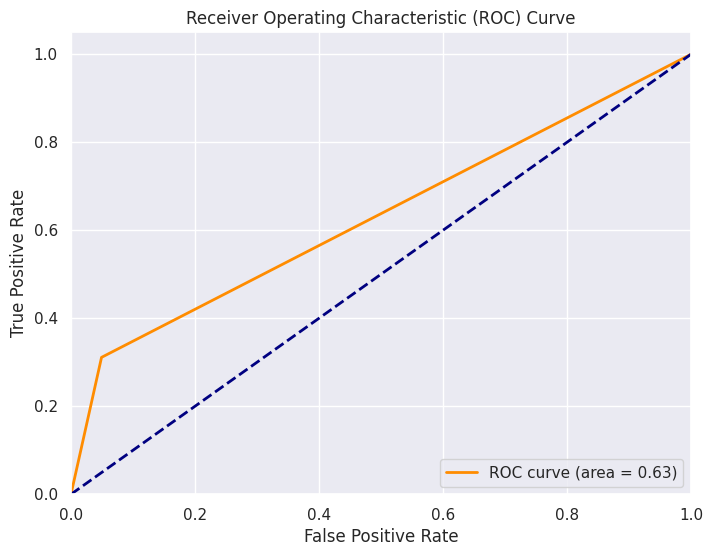

In [ ]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Observations**

* The **ROC-AUC score** was **0.63**.

# 4.Recommendations and Conclusion

**Hypothesis**

Knowing the most likely reasons why employees leave the organization, can help the organization act and reduce the level of Attrition inside the organization.

* **Monthly Income and Overtime:** As expected, Income is a huge factor as to why employees leave the organization in search of a better salary.
* **Age:** This could also be expected since people who are aiming to retire will leave the organization.

Based on the model's insights, we recommend the following to aim to reduce attrition rates and improve employee retention;

* Provide more opportunities for growth and promotion in the company in order to incentivise the employees especially the younger demographic to stay.


**Future Work**

In our model, we have only 1470 observations from the company, which is not an ideal sample size to create a machine learning model to predict attrition and act depending on this prediction. For that reason, we need to have more data from the company to improve our model's prediction accuracy.